¡Hola!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-scientist. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Hola! Recuerda que para los ejercicio de análisis de datos es necesario desarrollar la introducción, objetivo y etapas de análisis. Esto es crucial para cualquier proyecto, ya que establece una guía clara sobre los pasos a seguir. Tener estos elementos bien definidos desde el principio nos permite trabajar de manera más organizada y eficiente. En un futuro lo podrías complementar con una tabla de contenido.
</div>

# Proyecto Integrado (Sprint 6)

## Introducción

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

## Objetivo

Identificar patrones en las ventas de videjuegos, plataformas y géneros más convenienentes, que sirvan para crear una campaña publicitaria para el año 2017. 

## Etapas del análisis.

- Preparar los datos.
    - Hacer las correcciones y adiciones necesarias.
- Analizar los datos.
    - Juegos lanzados por año.
    - Ventas por plataforma.
    - Determinar periodo para mayores análisis. 
        - Plataformas líderes en ventas
        - Ventas promedio por plataforma.
        - Impacto de las reseñas en las ventas.
        - Géneros más rentables. 
    - Análisis por región.
        - Las 5 plataformas con mayor market share.
        - Los 5 géneros principales. 
        - Impacto del rating ESRB en las ventas. 
- Pruebas de hipótesis.


## Inicialización

### Importar librerías y cargar dataset

In [1]:
# Importar librerías

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Cargar el dataset

df = pd.read_csv("games.csv")

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
# Resumen de la información

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Impresión de primeras filas

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<span style="color:blue"> Comentario: 
- Existen valores nulos en las columnas: 2 en Name, 269 en Year_of_Release, 2 en Genre, 8578 en Critic_Score, 6701 en User_Score y 6766 en Rating. 
- Los tipos de datos para Year_of_Release y User_Score son inadecuados, deberán cambiarse por tipo datetime, para el primero, y float para el segundo. Estos cambios permitirán hacer operaciones correctamente con esos datos, si es necesario.  
- Los nombres de las columnas tienen un estilo inadecuado, deberán cambiarse por minúsculas.
</span>


## Preparación de los datos

### Corrección de los datos

In [5]:
# Cambio a minúsculas en los nombres de las columnas

df.columns = df.columns.str.lower()

In [6]:
# Cambio en el tipo de datos de la columna year_of_release a datetime

df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y')

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<div class="alert alert-block alert-info">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
En ocasiones podemos completar los valores faltantes con información recaba mediante una investigación. Es muy común que cuando trabajamos con datos en la vida real, mucho de estos vengan con valores nulos que en ocasiones tendremos que completar con proxys
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Hola Tonatihu, ¿qué significa proxys?
</div>

<div class="alert alert-block alert-info">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Significan valores que se pueden aproximar al valor real. Estos se usan cuando no contamos con los valores como tal y tenemos que construir una aproximación a estos valores
</div>

<span style="color:blue"> Comentario: 

- En un primer intento de cambiar los datos de la columna user_score por tipo númerico, aparece el error: 

        ValueError: Unable to parse string "tbd" at position 119  

- Se procede a realizar un análisis mayor: 
        ¿cuántos valores "tbd" hay?
        ¿hay valores "tbd" en otras columnas?

In [7]:
# Conteo de valores "tbd" en la columna user_score

(df['user_score'] == 'tbd').sum()


2424

In [8]:
# Búsqueda de valores únicos en la columna rating

df['rating'].value_counts()

rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

<span style="color:blue"> Comentario: 

Existen 2424 "tbd" en la columna user_score, sin presencia en la columna rating. Para lograr consistencia en los valores de la columna user_score, se convertira a datos float64 y los valores "tbd" en ausentes.

In [9]:
# Cambio en la columna user_score a datos float64, cambiando los valores "tbd" por NaN

df['user_score'] = pd.to_numeric(df['user_score'], 'coerce')

# Verificación del cambio

df['user_score'].dtypes

dtype('float64')

<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con el los ajustes en las dos variables anteriores. 
</div>

### Tratamiento de valores duplicados y ausentes

In [10]:
# Búsqueda de valores totalmente duplicados

df.duplicated().sum()

0

In [11]:
# Búsqueda de duplicados en la columna de videojuegos

df['name'].duplicated().sum()

5155

<div class="alert alert-block alert-success">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
 Como aprendiste en cursos anteriores, el análisis de registros duplicados es esencial en el análisis de datos para evitar que sesguen nuestros resultados.
</div>

In [12]:
# Porcentaje de valores ausentes en el dataset 

100 * df.isna().sum() / df.shape[0]

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

<span style="color:blue"> Comentario: 
- No hay filas totalmente duplicadas, pero sí hay 5155 juegos duplicados, debido a que fueron listados en varias plataformas simultáneamente o en diferentes años.
- Es lógico que haya valores duplicados en las columnas de score, por lo que no haré análisis en ellas. 
- Existen valores nulos en las columnas: name, year_of_release, genre, critic_score, user_score y rating. 
    - <span style="color:green">El porcentaje de valores nulos en las columnas name, year_of_release y genre, respecto a los datos totales, es muy bajo, por lo que los eliminaré.</span>
    - <span style="color:orange"> El porcentaje de valores nulos en los datos de critic_score, user_score y rating es demasiado alto, por lo que no puedo modificar esos valores o eliminarlos, ya que sesgaría los datos o alteraría los valores para análisis posteriores.</span> 
        - Examinaré los años en los que hay más valores ausentes. 

In [13]:
# Eliminación de datos ausentes en las columnas year_of_release, name y genre.

df = df.dropna(subset=['year_of_release', 'name', 'genre'])

# Confirmo el cambio en la información del dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16444 non-null  object        
 1   platform         16444 non-null  object        
 2   year_of_release  16444 non-null  datetime64[ns]
 3   genre            16444 non-null  object        
 4   na_sales         16444 non-null  float64       
 5   eu_sales         16444 non-null  float64       
 6   jp_sales         16444 non-null  float64       
 7   other_sales      16444 non-null  float64       
 8   critic_score     7983 non-null   float64       
 9   user_score       7463 non-null   float64       
 10  rating           9768 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.5+ MB


In [14]:
# Conteo de valores ausentes en user_score por año de lanzamiento

df[df['user_score'].isna()]['year_of_release'].value_counts().sort_values()

year_of_release
1980-01-01      9
1985-01-01     13
1988-01-01     14
1984-01-01     14
1987-01-01     16
1990-01-01     16
1989-01-01     17
1983-01-01     17
1986-01-01     21
1982-01-01     36
1991-01-01     41
1992-01-01     42
1981-01-01     46
1993-01-01     60
1994-01-01    120
1995-01-01    219
2001-01-01    225
2016-01-01    240
2013-01-01    240
2000-01-01    243
2014-01-01    252
1996-01-01    255
2003-01-01    259
1997-01-01    271
2004-01-01    273
1999-01-01    307
2015-01-01    309
2012-01-01    314
1998-01-01    348
2005-01-01    356
2002-01-01    365
2006-01-01    454
2007-01-01    568
2011-01-01    635
2008-01-01    766
2010-01-01    788
2009-01-01    812
Name: count, dtype: int64

<span style='color:blue'> Comentario: </span>

<span style='color:orange'> La mayor ausencia de score de usuarios se ha dado en los videojuegos lanzados después del año 2000. Estos años serán analizados más adelante, por lo que, modificar los score o eliminarlos pondría en riesgo su integridad para los análisis siguientes. </span>

## Enriquecer los datos

### Adición de columna total_sales

In [15]:
# Creación de columna total_sales
# Se sumna los valores de las columnas de cada región: na_sales, eu_sales, jp_sales y other_sales

df['total_sales'] = df['na_sales'] + \
    df['eu_sales']+df['jp_sales']+df['other_sales']

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de dos de las variables de la base de datos, consideraste ajustar los valores ausentes de las variables identificadas de score y muy buen trabajo con la suma de todas las ventas. 
    
   

</div>

<div class="alert alert-block alert-danger">
    <b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Solamente para terminar de complementar el análisis te recomiendo verificar si las variables de score de crititicos y ususarios  se deben de hacer algún ajuste. Por ejemplo completar los valores nulos
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Hola Tonatiuh, sobre los valores ausentes en los score de críticos y usuarios, había realizado un conteo de ellos y había concluido que eran demasiados, por lo que dejé mi anotación en los [comentarios respectivos](#tratamiento-de-valores-duplicados-y-ausentes), que ahora están en color anaranjado. En esta revisión agregué una tabla tabla con el porcentaje de valores ausentes por cada columna y mostré los años de lanzamiento con más ausencia de críticas de usuario. Dado que son muchos valores, considero que no podría modificarlos sin alterar los futuros análisis y pos eso mejor los dejo así. ¿Es incorrrecto mi proceder respecto a esta información?
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

## Análisis de datos

### Videojuegos lanzados por año

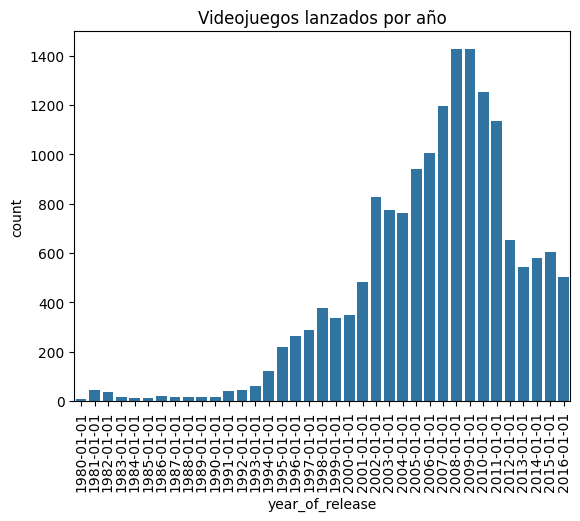

In [16]:
# Conteo de juegos que se lanzaron cada año

df_games = df['year_of_release'].value_counts().reset_index().sort_values(
    'year_of_release')  # Conteo de videojuego ordenados por año de lanzamiento

# Distribución de videojuegos lanzados por año

sns.barplot(df_games, x='year_of_release', y='count')

# Rotación de las etiquetas de los ejes en 90 grados

plt.xticks(rotation=90)

# Nombres de columna

plt.title('Videojuegos lanzados por año')

# Mostrar gráfico

plt.show()

<span style="color:blue"> Comentario: 

Hay una aceleración importante en el lanzamiento de videojuegos en el año 2002, con un máximo en el periodo 2008 - 2009. Los años previos al 2002 no son significativos. 

### Ventas por plataforma

In [17]:
# Agrupación por ventas totales y plataformas de los últimos 10 años.

df_2006 = df.query('year_of_release >= 2006')

df_group = df_2006.groupby('platform')['total_sales'].sum(
).sort_values(ascending=False).reset_index()

df_group

,platform,total_sales
0,X360,952.99
1,PS3,931.34
2,Wii,891.18
3,DS,655.35
4,PS4,314.14
5,PS2,265.80
6,3DS,257.81
7,PSP,238.63
8,PC,163.42
9,XOne,159.32


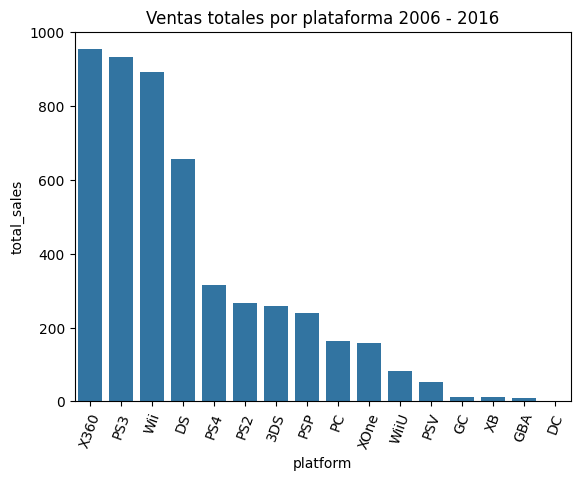

In [18]:
# Gráfico de ventas totales por plataforma

sns.barplot(df_group, x='platform', y='total_sales')

# Título

plt.title('Ventas totales por plataforma 2006 - 2016')

# Rotación de las etiquetas de los ejes en 70 grados

plt.xticks(rotation=70)

# Mostrar gráfico

plt.show()

<span style="color:blue"> Comentario: 

Las plataformas X360, PS3, Wii y DS  destacan como las plataformas con mayores ventas globales en el periodo 2006 - 2016. Con el top 10 de las plataformas filtraré las ventas por cada año para realizar una distribución.

In [19]:
# Selección de las primeras 10 plataformas con mayor venta total en el periodo 2006 - 2016.

filter_top_10 = df_group['platform'].iloc[:10]

filter_top_10

0    X360
1     PS3
2     Wii
3      DS
4     PS4
5     PS2
6     3DS
7     PSP
8      PC
9    XOne
Name: platform, dtype: object

In [20]:
# Filtrado del dataset por las 10 plataformas con mayor venta total

df_top_10 = df_2006.query('platform in @filter_top_10')

In [21]:
# Agrupación de datos por plataforma, año y venta total.
# Con esta información posteriormente se creará un gráfico para observar el comportamiento de las ventas a través de los años.

df_pivot = df_top_10.pivot_table(index='year_of_release',
                                 columns='platform',
                                 values='total_sales',
                                 aggfunc='sum')

df_pivot

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,Wii,X360,XOne
year_of_release,,,,,,,,,,
2006-01-01,NaN,119.81,2.85,103.42,20.96,NaN,55.32,137.15,51.62,NaN
2007-01-01,NaN,146.94,9.28,75.99,73.19,NaN,46.93,152.77,95.41,NaN
2008-01-01,NaN,145.31,12.42,53.90,118.52,NaN,34.55,171.32,135.26,NaN
2009-01-01,NaN,119.54,16.91,26.40,130.93,NaN,37.78,206.97,120.29,NaN
2010-01-01,NaN,85.02,24.28,5.64,142.17,NaN,35.04,127.95,170.03,NaN
2011-01-01,63.20,26.18,35.03,0.45,156.78,NaN,17.82,59.65,143.84,NaN
2012-01-01,51.36,11.01,23.22,NaN,107.36,NaN,7.69,21.71,99.74,NaN
2013-01-01,56.57,1.54,12.38,NaN,113.25,25.99,3.14,8.59,88.58,18.96
2014-01-01,43.76,NaN,13.28,NaN,47.76,100.00,0.24,3.75,34.74,54.07


<Axes: xlabel='year_of_release'>

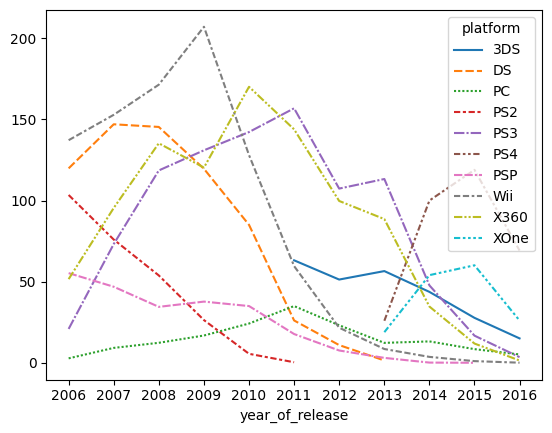

In [22]:
sns.lineplot(df_pivot)

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el desarrollo de la gráfica. Solamente te recomendaría que intentes reducir el periodo dado que el perido actual puede resultar muy extenso. Recordemos que con base en la información la popularidad la alcanzan en los primeros años. Es por ello que con un periodo largo puede no ser posible analizar de forma clara las plataformas y videojuegos actualizados y podrías estar analizando los desactualizados. Es por ello y dado que buscamos responder qué vender en 2017 te recomendareia gráficar un periodo que no supere los 5 años.     

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Hola Tonatiuh, en esta sección de arriba, mi intención fue mostrar los datos que fundamentaran mi elección para los análisis posteriores y por eso elegí un periodo amplio, ¿debía elegir desde antes el periodo más conveniente? 

Para esta revisión modifiqué mi elección de periodo para análizar de 2011 - 2016 (anterior) a 2016 - 2016. 
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

<span style="color:blue"> Comentario: 

1. En los últimos años todas las plataformas están perdiendo venta. Solo PS4, XOne y 3DS sobresalen, aunque también pierden.

2. Las plataformas que ya no generan ventas sobrevivieron entre 9 y 10 años. 

3. <span style="color:green"> Para los análisis posteriores seleccionaré el periodo 2012 - 2016, que abarca, más o menos, la mitad de la vida de una plataforma. </span>

### Análisis de datos: periodo seleccionado 2012 - 2016

In [23]:
# Selección de datos para el periodo 2012 - 2016

df_years_selected = df[df['year_of_release'] >= '2012']

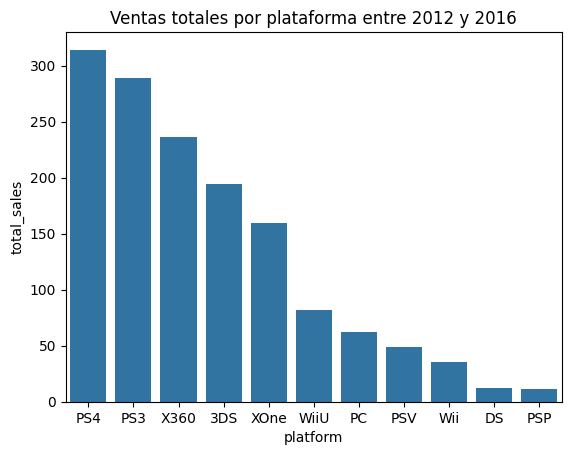

In [24]:
# Identificación de plataformas más rentables en el periodo 2012 - 2016

dys = df_years_selected.groupby('platform')['total_sales'].sum(
).sort_values(ascending=False).reset_index()

# Gráfico de los datos

sns.barplot(dys, x='platform', y='total_sales')

# Título
plt.title('Ventas totales por plataforma entre 2012 y 2016')

# Mostrar gráfico
plt.show()

<span style="color:blue"> Comentario:

En orden, las 5 plataformas con mayores ventas a nivel mundial para el periodo 2012 - 2016 son:
1. PS4
2. PS3
3. X360
4. 3DS
5. XOne

<Axes: xlabel='platform', ylabel='total_sales'>

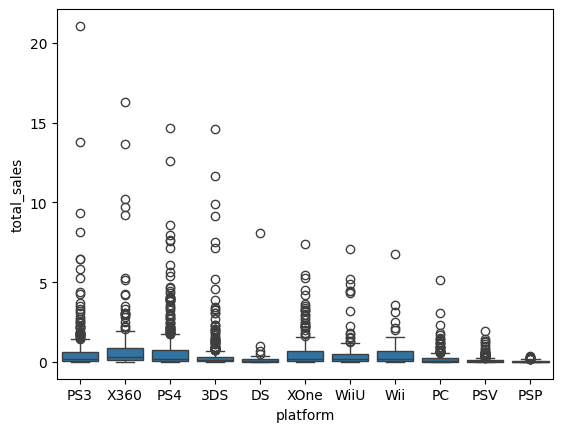

In [25]:
# Diagramas de caja para las ventas por plataforma 

sns.boxplot(data=df_years_selected, x='platform', y='total_sales')

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Te recomiendo que en una misma gráfica coloquemos todas las plataformas para que sea más sencilla la comparación    

</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

Realizado el ajuste en los gráficos, se ve mucho mejor.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes!
</div>

<span style=color:blue> Comentario

- La mediana de ventas para las 3 principales plataformas (PS4, PS3 y X360) del periodo 2012 - 2016 es similar y esta al rededor de 0.2 millones de dólares.
- Para las 5 plataformas con mayores ventas en el periodo (PS4, PS3, X360, 3DS, XOne), un videojuego con venta por arriba de 2 millones de dólares, aproximadamente, se puede concidir atípico.
    - Destaca PS3 con el videojuego con mayor venta del periodo, superior a los 20 millones de dólares.


#### Correlación entre reseñas y ventas 

In [26]:
# Selecciono la plataforma PS3 y elimino las ventas atípicas obtenidas en el diagrama de caja

df_ps3 = df_years_selected.query('platform == "PS3" & total_sales < 2')

df_ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
907,Diablo III,PS3,2013-01-01,Role-Playing,0.72,0.75,0.15,0.29,86.0,6.4,M,1.91
927,Madden NFL 25,PS3,2013-01-01,Sports,1.60,0.03,0.00,0.24,76.0,4.1,E,1.87
943,Max Payne 3,PS3,2012-01-01,Shooter,0.59,0.89,0.06,0.30,87.0,7.8,M,1.84
945,LEGO Marvel Super Heroes,PS3,2013-01-01,Action,0.77,0.76,0.01,0.29,82.0,7.9,E10+,1.83
1018,Kingdom Hearts,PS3,2013-01-01,Role-Playing,0.90,0.35,0.25,0.24,NaN,NaN,NaN,1.74
...,...,...,...,...,...,...,...,...,...,...,...,...
16628,Akatsuki no Goei Trinity,PS3,2012-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16638,Tour de France 2014,PS3,2014-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014-01-01,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Text(0.5, 1.0, 'PS3: score de críticos vs. ventas totales')

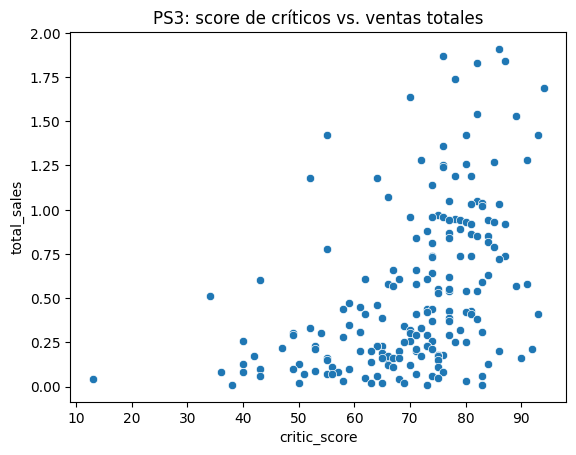

In [27]:
# Correlación entre el score de la crítica y las ventas totales

sns.scatterplot(data=df_ps3, x='critic_score', y='total_sales')

plt.title('PS3: score de críticos vs. ventas totales')

In [28]:
# Factor de correlación entre score de críticos y ventas totales

df_ps3[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.458639
total_sales,0.458639,1.000000


Text(0.5, 1.0, 'PS3: score de usuarios vs. ventas totales')

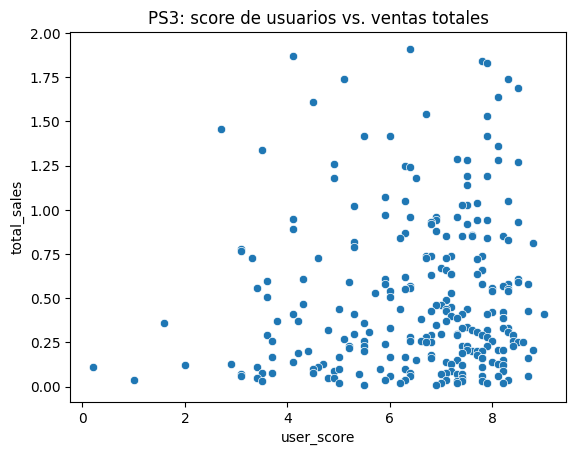

In [29]:
# Correlación entre el score de usuarios y las ventas totales

sns.scatterplot(data=df_ps3, x='user_score', y='total_sales')

plt.title('PS3: score de usuarios vs. ventas totales')

In [30]:
# Factor de correlación entre score de usuarios y ventas totales

df_ps3[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.085422
total_sales,0.085422,1.000000


<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el análisis de la relación estre las scores y las ventas. 
</div>

<span style=color:blue> Comentario:

En la plataforma PS3: 

- Hay una correlación positiva entre la reseña de los profesionales y las ventas (0.45)
- No hay correlación entre las reseñas de los usuarios y las ventas. 

In [31]:
# Selecciono los títulos listados en PS3

games_ps3 = df_ps3['name'].unique()

games_ps3

array(['Diablo III', 'Madden NFL 25', 'Max Payne 3',
       'LEGO Marvel Super Heroes', 'Kingdom Hearts', 'Watch Dogs',
       "Dragon's Dogma", 'BioShock Infinite', 'Call of Duty: Black Ops 3',
       'Beyond: Two Souls', 'Destiny', 'Pro Evolution Soccer 2013',
       'Dishonored', 'Madden NFL 15', 'Mass Effect 3',
       'Metal Gear Rising: Revengeance', 'Medal of Honor: Warfighter',
       "WWE '13", 'NBA 2K15', 'Far Cry 4', "Assassin's Creed: Rogue",
       'Dark Souls II', 'Final Fantasy X / X-2 HD Remaster',
       'Need for Speed Rivals', 'Saints Row IV', 'FIFA Street',
       'Kingdom Hearts II', 'LEGO Batman 2: DC Super Heroes',
       'Injustice: Gods Among Us', 'One Piece: Pirate Warriors',
       'Resident Evil: Operation Raccoon City', 'WWE 2K14',
       'Final Fantasy XIV: A Realm Reborn',
       'Lightning Returns: Final Fantasy XIII', 'Skylanders Giants',
       'LEGO The Lord of the Rings', 'Sleeping Dogs', 'F1 2012',
       'UFC Undisputed 3', 'Skylanders SWAP Force',

In [32]:
# Uso la lista anterior para filtrar en X360  y PS4, eliminando las ventas atípicas de cada plataforma

games_x360 = df_years_selected.query('name in @games_ps3 & platform == "X360" & total_sales < 2.5')

# Filtro ahora en PS4

games_ps4 = df_years_selected.query('name in @games_ps3 & platform == "PS4" & total_sales < 2.5')

Text(0.5, 1.0, 'X360: score de profesionales vs ventas totales')

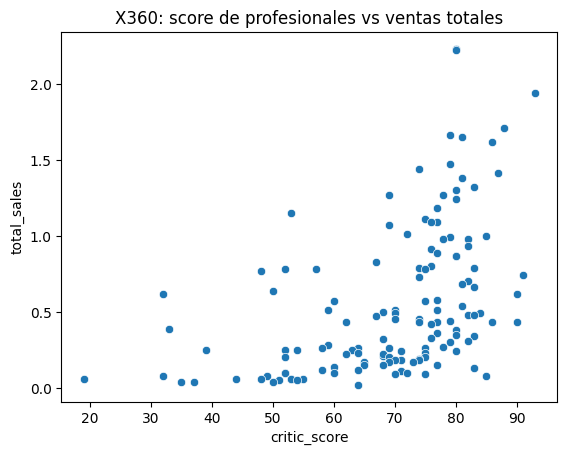

In [33]:
# Correlación entre score de críticos y ventas totales en X360

# Gráfico score de profesionales vs ventas totales
sns.scatterplot(games_x360, x='critic_score', y='total_sales')

plt.title('X360: score de profesionales vs ventas totales')

In [34]:
# Factor de correlación entre score de profesionales y ventas totales en X360

games_x360[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.465648
total_sales,0.465648,1.000000


Text(0.5, 1.0, 'X360: score de usuarios vs ventas totales')

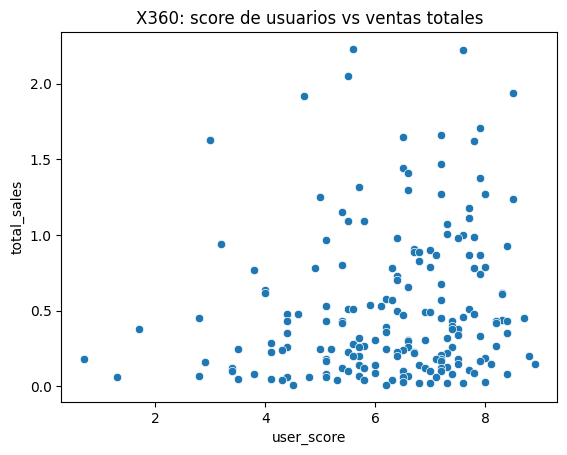

In [35]:
# Correlación de score de usuarios vs ventas totales en X360

# Gráfico de dispersión
sns.scatterplot(games_x360, x='user_score', y='total_sales')

plt.title('X360: score de usuarios vs ventas totales')

In [36]:
# Factor de correlación entre score de usuarios y ventas totales en X360

games_x360[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.152575
total_sales,0.152575,1.000000


Text(0.5, 1.0, 'PS4: score de profesionales vs ventas totales')

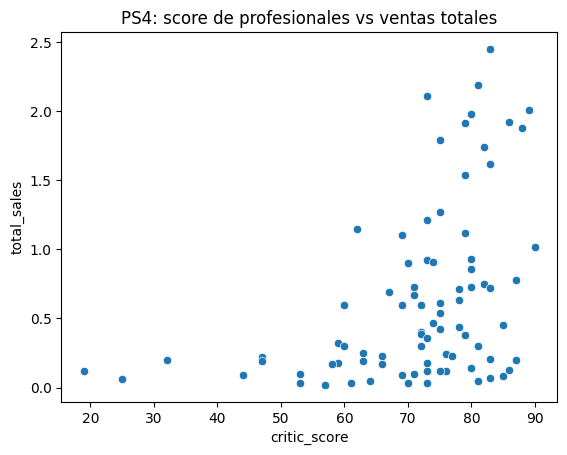

In [37]:
# Correlación entre score de profesionales y ventas totales en PS4

# Gráfico de dispersión

sns.scatterplot(games_ps4, x='critic_score', y='total_sales')

plt.title('PS4: score de profesionales vs ventas totales')

In [38]:
# Factor de correlación entre score de profesionales y ventas totales en PS4

games_ps4[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.412466
total_sales,0.412466,1.000000


Text(0.5, 1.0, 'PS4: score de usuarios vs ventas totales')

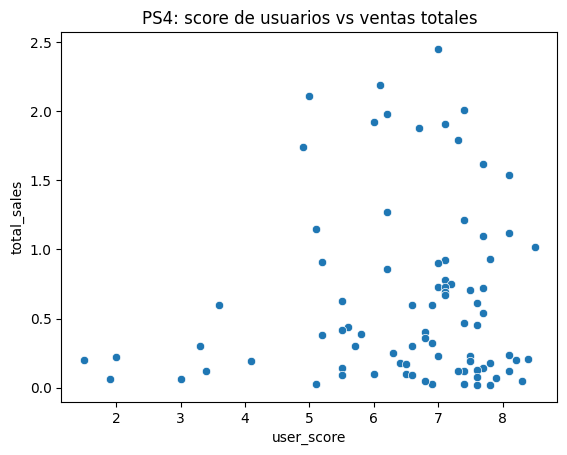

In [39]:
# Correlación entre score de usuarios y ventas totales en PS4

# Gráfico de dispersión

sns.scatterplot(games_ps4, x='user_score', y='total_sales')

plt.title('PS4: score de usuarios vs ventas totales')

In [40]:
# Factor de correlación entre score de usuarios y ventas totales en PS4

games_ps4[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.090059
total_sales,0.090059,1.000000


<span style=color:blue> Comentario:

Para las plataforma X360 y PS4: 

- La correlación entre las críticas de los profesionales y las ventas totales son similares y consistentes entre las tres plataformas (PS3, PS4 y X360),con un valor positivo de 0.4 
- Igual que en PS3, no hay correlación entre las reseñas de los usuarios y las ventas.

#### Ventas por género de videojuego

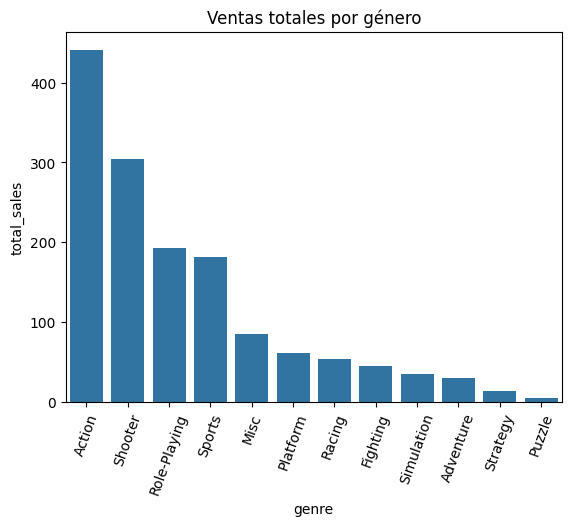

In [41]:
# Agrupo por genero y calculo las ventas globales para todas los juegos en el periodo 2012 - 2016

dys_genre = df_years_selected.groupby(
    'genre')['total_sales'].sum().reset_index()

# Ordenamiento descendente de las ventas totales

dys_genre = dys_genre.sort_values(by='total_sales', ascending=False)

# Gráfico de barras

sns.barplot(dys_genre, x='genre', y='total_sales')

# Título del gráfico

plt.title('Ventas totales por género')

# Rotación de las etiquetas de los ejes en 70 grados

plt.xticks(rotation=70)

# Mostrar gráfico

plt.show()

<span style=color:blue> Comentario:

Los 5 géneros más rentables a nivel mundial para el periodo 2011 - 2016:
1. Action
2. Shooter
3. Role_playing
4. Sports
5. Misc

#### Análisis por región

##### Región NA

In [42]:
df_years_selected

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012-01-01,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014-01-01,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [43]:
# Selección de la región na, con base en ventas mayores a 0 en esta región

df_na = df_years_selected.query('na_sales > 0')[
    ['platform', 'genre', 'rating', 'na_sales']]

df_na

,platform,genre,rating,na_sales
16,PS3,Action,M,7.02
23,X360,Action,M,9.66
31,PS4,Shooter,NaN,6.03
33,3DS,Role-Playing,NaN,5.28
34,PS3,Shooter,M,4.99
...,...,...,...,...
16615,3DS,Puzzle,E,0.01
16618,PSV,Adventure,M,0.01
16660,XOne,Action,NaN,0.01
16672,XOne,Action,M,0.01


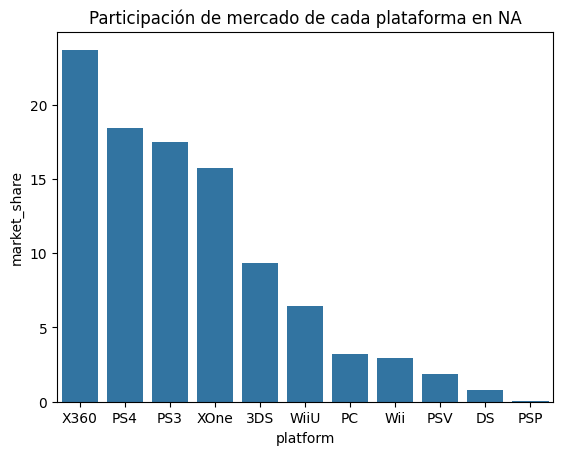

In [44]:
# Agrupación de plataformas y sus ventas en la región

na_share = df_na.groupby('platform')['na_sales'].sum(
).sort_values(ascending=False).reset_index()

# Creo una columna que muestre la participación de mercado de cada plataforma en su región

na_share['market_share'] = na_share['na_sales']/na_share['na_sales'].sum()*100

# Gráfico de la participación de mercado

sns.barplot(na_share, x='platform', y='market_share')

# Título

plt.title('Participación de mercado de cada plataforma en NA')

plt.show()

<span style=color:blue> Comentario:

En la región de Norteamérica, las 5 plataformas con más ventas son:
1. X360
2. PS3
3. PS4
4. XOne
5. 3DS

- En esta región, X360, se coloca como el primer lugar, con una diferencia de más de 5 puntos de MS sobre PS3 y más de 10 puntos sobre PS4.
- Las posiciones 3,4 y 5 tiene una diferencia menor entre ellas, de menos 3 puntos de MS.

In [45]:
# Agrupación de géneros y sus ventas en la región

df_na.groupby('genre')['na_sales'].sum().sort_values(
    ascending=False).reset_index()

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19
5,Platform,25.38
6,Fighting,19.79
7,Racing,17.22
8,Adventure,8.92
9,Simulation,7.97


<span style=color:blue> Comentario:

En la región de Norteamérica, los 5 géneros con más ventas son:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Este ranking es similar al mundial, solo difiere por el género Sport que ocupa la posición 3 en la región y el 4 en el mundial.

Text(0.5, 1.0, 'Ventas en la región NA por rating ESRB')

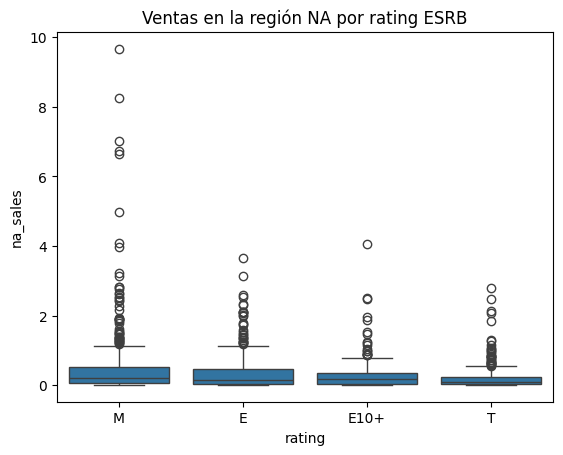

In [46]:
# Distribución de ventas, con base en el rating ESRB

sns.boxplot(df_na, x='rating', y='na_sales')  # Creación de diagrama de caja

plt.title('Ventas en la región NA por rating ESRB')

<span style=color:blue> Comentario:

- Las juegos con ventas más altas tiene clasificación M (Mayores de 17 años).
- Las clasificaciones E, E10+ y T tienen ventas similares.
- En todas las clasificaciones, las ventas por arriba de 1.5 millones de dólares, son atípicas.

##### Región UE

In [47]:
# Selección de la región eu, con base en ventas mayores a 0 en esta región

df_eu = df_years_selected.query('eu_sales > 0')[
    ['platform', 'genre', 'rating', 'eu_sales']]

df_eu

,platform,genre,rating,eu_sales
16,PS3,Action,M,9.09
23,X360,Action,M,5.14
31,PS4,Shooter,NaN,5.86
33,3DS,Role-Playing,NaN,4.19
34,PS3,Shooter,M,5.73
...,...,...,...,...
16645,XOne,Action,NaN,0.01
16652,WiiU,Action,E,0.01
16654,X360,Action,E10+,0.01
16674,PS3,Action,NaN,0.01


In [48]:
# Agrupación de plataformas y sus ventas en la región

df_eu.groupby('platform')['eu_sales'].sum(
).sort_values(ascending=False).reset_index()

,platform,eu_sales
0,PS4,141.09
1,PS3,106.86
2,X360,74.52
3,XOne,51.59
4,3DS,42.64
5,PC,37.76
6,WiiU,25.13
7,Wii,11.92
8,PSV,11.36
9,DS,3.53


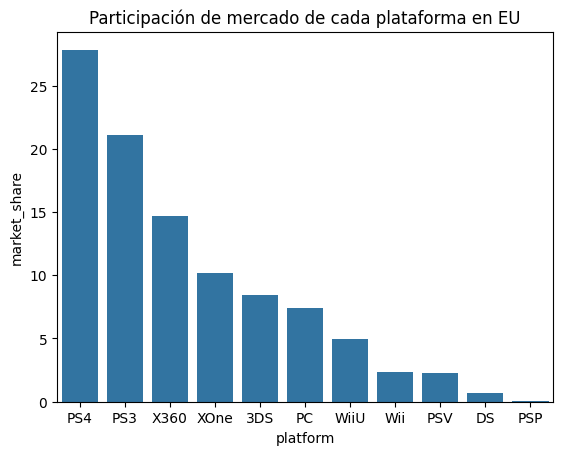

In [49]:
# Agrupación de plataformas y sus ventas en la región

eu_share = df_eu.groupby('platform')['eu_sales'].sum(
).sort_values(ascending=False).reset_index()

# Creo una columna que muestre la participación de mercado de cada plataforma en su región

eu_share['market_share'] = eu_share['eu_sales']/eu_share['eu_sales'].sum()*100

# Gráfico de la participación de mercado

sns.barplot(eu_share, x='platform', y='market_share')

# Título

plt.title('Participación de mercado de cada plataforma en EU')

plt.show()

<span style=color:blue> Comentario:

En la región europea, las 5 plataformas con mayores ventas son:

1. PS3
2. PS4
3. X360
4. 3DS
5. PC

- En esta región, se invierten los primeros lugares, respecto a la región NA, con una ventaja de cerca de 7.5 puntos de MS entre PS3 y X360. 
- X360 duplica el MS de las plataformas 4 y 5 en el ranking. 

In [50]:
# Agrupación de géneros y sus ventas en la región

df_eu.groupby('genre')['eu_sales'].sum().sort_values(
    ascending=False).reset_index()

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29
5,Misc,26.32
6,Platform,21.41
7,Simulation,14.55
8,Fighting,10.79
9,Adventure,9.46


<span style=color:blue> Comentario:

En la región europea, los 5 géneros con más ventas son:
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

Los géneros más populares son similares a los de norteamérica, solo cambiando la 5a posición, que en este caso lo ocupa el género Racing. 

Text(0.5, 1.0, 'Ventas en la región EU por rating ESRB')

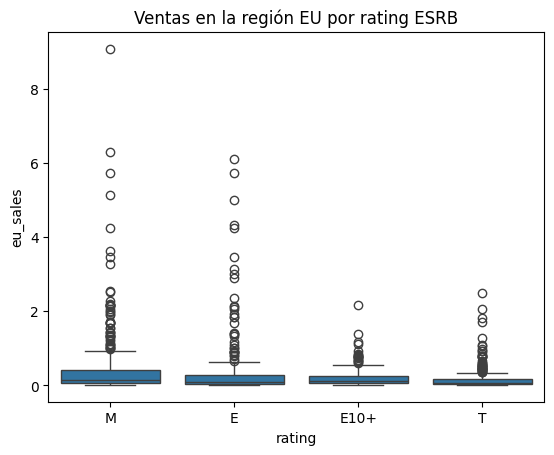

In [51]:
# Distribución de ventas, con base en el rating ESRB

sns.boxplot(df_eu, x='rating', y='eu_sales')  # Creación de diagrama de caja

plt.title('Ventas en la región EU por rating ESRB')

<span style=color:blue> Comentario:

- Las juegos con ventas más altas tiene clasificación M (Mayores de 17 años).
- Las clasificaciones E, E10+ y T tienen ventas similares.
- En todas las clasificaciones, las ventas por arriba de 1 millón de dólares, son atípicas.

##### Región JP

In [52]:
# Selección de la región jp, con base en ventas mayores a 0 en esta región

df_jp = df_years_selected.query('jp_sales > 0')[
    ['platform', 'genre', 'rating', 'jp_sales']]

df_jp

,platform,genre,rating,jp_sales
16,PS3,Action,M,0.98
23,X360,Action,M,0.06
31,PS4,Shooter,NaN,0.36
33,3DS,Role-Playing,NaN,4.35
34,PS3,Shooter,M,0.65
...,...,...,...,...
16703,PSV,Adventure,NaN,0.01
16707,PSV,Misc,NaN,0.01
16710,PS3,Action,NaN,0.01
16712,PSV,Adventure,NaN,0.01


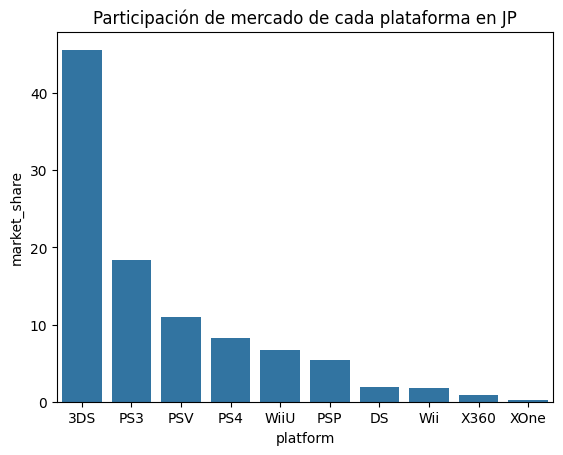

In [53]:
# Agrupación de plataformas y sus ventas en la región

jp_share = df_jp.groupby('platform')['jp_sales'].sum(
).sort_values(ascending=False).reset_index()

# Creo una columna que muestre la participación de mercado de cada plataforma en su región

jp_share['market_share'] = jp_share['jp_sales']/jp_share['jp_sales'].sum()*100

# Gráfico de la participación de mercado

sns.barplot(jp_share, x='platform', y='market_share')

# Título

plt.title('Participación de mercado de cada plataforma en JP')

plt.show()

<span style=color:blue> Comentario:

En Japón, las 5 plataformas con mayores ventas son:

1. 3DS
2. PS3
3. PSP
4. PSV
5. PS4

- No solo hay un gran domino de las plataformas de origen asiático en la región, también sobresale la penetracion de mercado que tiene 3DS, con un MS de 40%, algo que ninguna plataforma tiene en otras regiones. 
- 3DS duplica el MS de PS3, con el segundo lugar, que a su vez duplica el de PSP (tercer lugar).
- En esta región, X360 retrocede fuertemente hasta 8a posición con un MS de 3%.

In [54]:
# Agrupación de géneros y sus ventas en la región

df_jp.groupby('genre')['jp_sales'].sum().sort_values(
    ascending=False).reset_index()

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44
5,Shooter,9.23
6,Platform,8.63
7,Adventure,8.24
8,Sports,8.01
9,Strategy,2.88


<span style=color:blue> Comentario:

En la región japonesa, los 5 géneros con más ventas son:

1. Role-Playing
2. Action
3. Misc
4. Fighting
5. Platform

- Los géneros más populares son muy distintos de aquellos en las regiones NA y EU. 
- Mientras el género Role-Playing se posiciona como el 4o más popular en NA y EU, en Japón es el número uno.

Text(0.5, 1.0, 'Ventas en la región JP por rating ESRB')

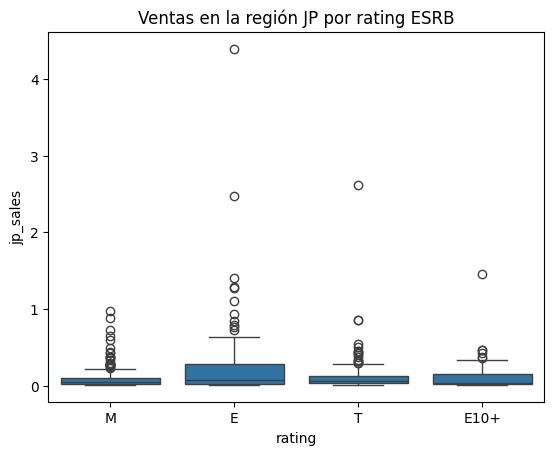

In [55]:
# Distribución de ventas, con base en el rating ESRB

sns.boxplot(df_jp, x='rating', y='jp_sales')  # Creación de diagrama de caja

plt.title('Ventas en la región JP por rating ESRB')

<span style=color:blue> Comentario:

- Las juegos con ventas más altas tienen clasificación E (para todo público) y E10+ (mayores de 10 años), lo contrario a lo que sucede en las otras dos regiones, donde estas clasificaciones tienen las ventas más bajas.
- La distribución de las ventas es diferente en esta región, con valores atípicos por arriba de 0.5 millones de dólares para el rating con más ventas (E), un nivel más bajo que en NA y EU (1.5 y 1 MUSD, respectivamente).

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>

Excelente! Con este análisis por región ayuda a complementar el análisis general anterior y a hacer zoom a los resultados por cada una de las regiones.   

</div>

## Pruebas de hipótesis

### Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

In [56]:
# Comienzo generando dos nuevos dataframe: uno para Xbox One y otro para PC

# Filtro para XOne y extraigo la columna 'user_score'
df_xone = df_years_selected.query('platform == "XOne"')['user_score']

# Filtro para PC y extraigo la columna 'user_score'
df_pc = df_years_selected.query('platform == "PC"')['user_score']

In [57]:
# Para esta prueba eliminaré los valores ausentes en ambos dataframe.

df_xone = df_xone.dropna()

df_pc = df_pc.dropna()

In [58]:
# Prueba de hipótesis sobre la igualdad de las medias de dos poblaciones

# La prueba a realizar requiere conocer si las varianzas de las poblacione son iguales.
# Realizaré primero una prueba de Levene, para determinar la igualdad de las varianzas.

# Prueba de Levene

# H0: las varianzas de las calificaciones de los usuarios de Xbox One y PC son iguales
# HA: las varianzas de las calificaciones de los usuarios de Xbox One y PC son diferentes

alpha = 0.05

results = st.levene(df_xone, df_pc)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula: las varianzas de las calificaciones de los usuarios de Xbox One y PC son diferentes')
else:
    print('No podemos rechazar la hipótesis nula: las varianzas de las calificaciones de los usuarios de Xbox One y PC son iguales')

valor p: 0.012514842818505541
Rechazamos la hipótesis nula: las varianzas de las calificaciones de los usuarios de Xbox One y PC son diferentes


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo!! Es importante mostrar si se cumplen los supuestos cuandor realizamos pruebas de hipótesis.
</div>

In [59]:
# Realizo la prueba de hipótesis para estos datos:

# H0: las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
# HA: las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

alpha = 0.05

# Las varianzas son diferentes, de acuerdo a la prueba de Levene.
results = st.ttest_ind(df_xone, df_pc, equal_var=False)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.')
else:
    print('No podemos rechazar la hipótesis nula: las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.')

valor p: 0.5489537965134912
No podemos rechazar la hipótesis nula: las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.


### Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [60]:
# Comienzo generando dos nuevos dataframe: uno para género de acción y otro para deportes.

# Filtro para XOne y extraigo la columna 'user_score'
df_action = df_years_selected.query('genre == "Action"')['user_score']

# Filtro para PC y extraigo la columna 'user_score'
df_sports = df_years_selected.query('genre == "Sports"')['user_score']

In [61]:
# Para esta prueba eliminaré los valores ausentes en ambos dataframe.

df_action = df_action.dropna()

df_sports = df_sports.dropna()

In [62]:
# Prueba de hipótesis sobre la igualdad de las medias de dos poblaciones

# La prueba a realizar requiere conocer si las varianzas de las poblacione son iguales.
# Realizaré primero una prueba de Levene, para determinar la igualdad de las varianzas.

# Prueba de Levene

# H0: las varianzas de las calificaciones de los usuarios de los géneros Action y Sports son iguales.
# HA: las varianzas de las calificaciones de los usuarios de los géneros Action y Sports son diferentes.

alpha = 0.05

results = st.levene(df_action, df_sports)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula: las varianzas de las calificaciones de los usuarios de los géneros Action y Sports son diferentes.')
else:
    print('No podemos rechazar la hipótesis nula: las varianzas de las calificaciones de los usuarios de los géneros Action y Sports son iguales.')

valor p: 1.3125789036876737e-05
Rechazamos la hipótesis nula: las varianzas de las calificaciones de los usuarios de los géneros Action y Sports son diferentes.


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo!! Es importante mostrar si se cumplen los supuestos cuandor realizamos pruebas de hipótesis.
</div>

In [63]:
# Realizo la prueba de hipótesis para estos datos:

# H0: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
# HA: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

alpha = 0.05

# Las varianzas son diferentes, de acuerdo a la prueba de Levene.
results = st.ttest_ind(df_action, df_sports, equal_var=False)

print('valor p:', results.pvalue)

if results.pvalue < alpha:
    print('Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.')
else:
    print('No podemos rechazar la hipótesis nula: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.')

valor p: 4.24307776572644e-20
Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente trabajo con el desarrollo de las pruebas de hipótesis
</div>

<span style=color:blue> Comentario:

De acuerdo a las pruebas de hipótesis realizadas:

1. Las calificaciones de usuario para las plataformas Xbox One y pc son las mismas, lo cual quizas se deba a la relación que hay entre el creador de Xbox One (Microsoft) y su participación tan relevante en el sector de las PC.

2. Las calificaciones de usuario para los géneros de acción y deportes son diferentes. Esto tiene bastante sentido, dado que no hay similitud entre estos géneros. 

## Conclusiones generales.

1. El tiempo de vida de las platformas es de 9 a 10 años, por lo que las seleccionadas para vender en los próximos años deben ser aquellas que aún no tengan ese tiempo. 
2. A nivel global, la mediana de ventas en todas las plataformas es de aproximadamente 0.5 millones de dólares, con ventas atípicas por arriba de 2 millones de dólares. Por lo tanto, un lanzamiento se puede considerar exitoso si vende más de 0.5 millones de dólares.
3. En las plataformas Xbox 360, PS3 y PS4, las reseñas de los profesionales impactan ligeramente en las ventas. Sin embargo, las reseñas de los usuarios no tienen ningún impacto en las ventas.
4. Las plataformas y géneros más exitosos dependen de la región. Un lanzamiento en Xbox 360 sería exitoso en Norteamérica, pero, definitivamente, no lo sería en Japón, donde la plataforma 3DS es el líder indiscutible. De la misma manera, un videojuego de Role-Playing sería muy exitoso en Japón, pero no en Norteamérica, donde es más exitoso el género de acción.
5. El impacto del rating ESRB en las ventas también varía en cada región. Mientras en Japón los juegos más exitosos son para todas las edades (E o E10+), en Europa y Norteamérica son los clasificados para mayores de 17 años (M). 
6. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son estadisticamente iguales, por lo que se pueden esperar reseñas similares para videojuegos lanzados en estas plataformas. 
7. Las calificaciones de usuario para los géneros de acción y deportes son diferentes. Esto tiene bastante sentido, dado que no hay similitud entre estos géneros.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de beuna manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:

* Verificar que cuando llenamos variables con valores nulos los estamos comletando con valores que no sesgan nuestros resultados

*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados. 

    
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

- Gracias Tonatiuh, complementé mis análisis respecto a los valores nulos y argumenté sobre mi decisión, espero que haya sido más acertada.

- En esta ocasión eliminé valores atípicos para los análisis de correlación entre reseñas y ventas por plataforma, espero que eso haya sido correcto también.

</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy buen trabajo con los ajustes! Que sigas disfrutando los siguientes cursos!
</div>